<a href="https://colab.research.google.com/github/mavillan/gb-vpp/blob/main/models/gb-vpp-lstm-gru-tangle-2h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

!pip install --upgrade kaggle > /dev/null 2>&1
!mkdir -p ~/.kaggle/ && cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [2]:
!pip uninstall -y tensorflow 
!pip install tensorflow==2.4.3 > /dev/null 2>&1
!pip install tensorflow-addons > /dev/null 2>&1

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

import os
from tensorflow.python.profiler import profiler_client
#tpu_profile_service_address = os.environ['COLAB_TPU_ADDR'].replace('8470', '8466')
#print(profiler_client.monitor(tpu_profile_service_address, 100, 2))

Found existing installation: tensorflow 2.4.3
Uninstalling tensorflow-2.4.3:
  Successfully uninstalled tensorflow-2.4.3
Tensorflow version 2.4.3
Running on TPU  ['10.35.216.74:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.35.216.74:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.35.216.74:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [4]:
!mkdir -p input/
!kaggle competitions download -c ventilator-pressure-prediction -p input/ --force

!unzip -o input/sample_submission.csv.zip -d input/
!unzip -o input/train.csv.zip -d input/
!unzip -o input/test.csv.zip -d input/

 90% 125M/139M [00:00<00:00, 130MB/s]
100% 139M/139M [00:00<00:00, 151MB/s]
  0% 0.00/8.50M [00:00<?, ?B/s]
100% 8.50M/8.50M [00:00<00:00, 140MB/s]
 85% 64.0M/75.4M [00:00<00:00, 185MB/s]
100% 75.4M/75.4M [00:00<00:00, 217MB/s]
Archive:  input/sample_submission.csv.zip
  inflating: input/sample_submission.csv  
Archive:  input/train.csv.zip
  inflating: input/train.csv         
Archive:  input/test.csv.zip
  inflating: input/test.csv          


In [5]:
!kaggle datasets download --unzip --force -d mavillan/gb-vpp-folds-split

  0% 0.00/7.57M [00:00<?, ?B/s]
100% 7.57M/7.57M [00:00<00:00, 69.7MB/s]


In [6]:
input_path = "input"
subs_path = "/content/drive/MyDrive/kaggle/gb-vpp/subs"
results_path = "/content/drive/MyDrive/kaggle/gb-vpp/results"
artifacts_path = "/content/drive/MyDrive/kaggle/gb-vpp/artifacts"

In [7]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            35G        1.2G         22G        1.1M         11G         33G
Swap:            0B          0B          0B


***

In [8]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import Callback

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.model_selection import train_test_split, GroupKFold, KFold
from sklearn.preprocessing import LabelEncoder

from IPython.display import display

In [9]:
def reduce_mem_usage(df, verbose=False):
    """
    Utility function to reduce the memory usage of pandas dataframes
    
    Parameters
    ----------
    df: pandas.Dataframe
    verbose: Boolean
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

***
## data preparation

In [10]:
class config:
    # data params
    SEQ_LEN = 80

    # train params
    EPOCHS = 300
    BATCH_SIZE = 512
    SCHEDULER_PATIENCE = 10
    SCHEDULER_FACTOR = 0.75
    STOPPING_PATIENCE = 35
    
    # others
    MODEL_ID = "lstm-gru-tangle-2h"
    DEBUG = False
    
if config.DEBUG:
    config.EPOCHS = 2


In [11]:
with open("./split_8folds_seed23.pkl", "rb") as file:
    split = pickle.load(file)

In [12]:
train_raw = pd.read_csv(f'{input_path}/train.csv')
test_raw = pd.read_csv(f'{input_path}/test.csv')
submission = pd.read_csv(f'{input_path}/sample_submission.csv')

In [13]:
PRESSURE_VALUES = np.sort(train_raw.pressure.unique())

PRESSURE_MIN = train_raw.pressure.min()
PRESSURE_MAX = train_raw.pressure.max()
PRESSURE_STEP = PRESSURE_VALUES[1]-PRESSURE_VALUES[0]

def pressure_to_idx(array):
    return ((array - PRESSURE_MIN) / PRESSURE_STEP).astype(int)

def idx_to_pressure(array):
    return (array * PRESSURE_STEP) + PRESSURE_MIN

In [14]:
mapping = {j:i for i,j in enumerate(train_raw.breath_id.unique())}
train_raw["breath_id"] = train_raw.breath_id.map(mapping)

if config.SEQ_LEN < 80:

    train_raw = (
        train_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(config.SEQ_LEN)
        .reset_index(drop=True)
    )
    test_raw = (
        test_raw
        .sort_values(["breath_id","time_step"])
        .groupby("breath_id")
        .head(config.SEQ_LEN)
        .reset_index(drop=True)
    )

In [15]:
def compute_feats(df):
    df['cross1']= df['u_in'] * df['u_out']
    df['cross2']= df['u_in'] * (1-df['u_out'])

    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    df['u_in_cummean'] = df['u_in_cumsum'] / (df.groupby("breath_id")["id"].cumcount()+1)
    df['u_in_max'] = df.groupby(['breath_id'])['u_in'].transform('max')

    df['time_since_expiratory']= df['time_step']*df['u_out']
    df["time_diff"] = df.groupby("breath_id")["time_step"].diff()

    df['vol_diff'] = (df['time_diff']*df['u_in']).fillna(0)
    df['vol_diff_cumsum'] = df.groupby('breath_id')['vol_diff'].cumsum()
    df["time_diff"] = df["time_diff"].fillna(method="bfill")
    
    df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    df['u_in_lag5'] = df.groupby('breath_id')['u_in'].shift(5)
    df['u_in_lag6'] = df.groupby('breath_id')['u_in'].shift(6)
    df['u_in_lag7'] = df.groupby('breath_id')['u_in'].shift(7)
    df = df.fillna(0)

    df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
    df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
    df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
    df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']
    df['u_in_diff5'] = df['u_in'] - df['u_in_lag5']
    df['u_in_diff6'] = df['u_in'] - df['u_in_lag6']
    df['u_in_diff7'] = df['u_in'] - df['u_in_lag7']

    df['R_raw'] = df['R'].copy()
    df['C_raw'] = df['C'].copy()
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df = pd.get_dummies(df)
    
    return df

print("Train data...\n")
train = compute_feats(train_raw)
train = reduce_mem_usage(train, verbose=True)
print("\nTest data...\n")
test = compute_feats(test_raw)
test = reduce_mem_usage(test, verbose=True)

del train_raw,test_raw
gc.collect()

Train data...

Mem. usage decreased to 696.52 Mb (52.4% reduction)

Test data...

Mem. usage decreased to 449.00 Mb (52.4% reduction)


0

In [16]:
targets = train[['pressure']].to_numpy().reshape(-1, config.SEQ_LEN)
mask_out = train[["u_out"]].to_numpy().reshape(-1, config.SEQ_LEN)
mask_in = 1-mask_out

oof = train[["id","breath_id","u_out","pressure"]].copy()
test_raw = test[["id"]].copy()

cols_to_exclude_train = [
    'pressure','id', 'breath_id',
]
cols_to_exclude_test = [
    'id', 'breath_id',
]

train.drop(cols_to_exclude_train, axis=1, inplace=True)
test.drop(cols_to_exclude_test, axis=1, inplace=True)

train.insert(0, "u_in", train.pop("u_in").values)
train.insert(1, "u_out", train.pop("u_out").values)

test.insert(0, "u_in", test.pop("u_in").values)
test.insert(1, "u_out", test.pop("u_out").values)

assert (train.columns == test.columns).all()

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   u_in                   float32
 1   u_out                  int8   
 2   time_step              float32
 3   cross1                 float32
 4   cross2                 float32
 5   u_in_cumsum            float32
 6   u_in_cummean           float32
 7   u_in_max               float32
 8   time_since_expiratory  float32
 9   time_diff              float32
 10  vol_diff               float32
 11  vol_diff_cumsum        float32
 12  u_in_lag1              float32
 13  u_in_lag2              float32
 14  u_in_lag3              float32
 15  u_in_lag4              float32
 16  u_in_lag5              float32
 17  u_in_lag6              float32
 18  u_in_lag7              float32
 19  u_in_diff1             float32
 20  u_in_diff2             float32
 21  u_in_diff3             float32
 22  u_in_diff4        

In [18]:
scaler = RobustScaler()
train = scaler.fit_transform(train).astype(np.float32)
test = scaler.transform(test).astype(np.float32)
gc.collect()

train = train.reshape(-1, config.SEQ_LEN, train.shape[1])
test =  test.reshape(-1, config.SEQ_LEN, train.shape[2])

***
## model training

In [22]:
def masked_l1_loss(y_true, y_pred, mask):
    return tf.keras.losses.mae(tf.boolean_mask(y_true, mask), tf.boolean_mask(y_pred, mask))

class LSTMGRU2Heads(tf.keras.Model):

    def __init__(self):
        super(LSTMGRU2Heads, self).__init__()

        self.alpha = 1.

        # feature extrators on u_in
        self.conv1 = layers.Conv1D(32, 5, padding="same", activation='tanh')

        self.lstm1 = layers.Bidirectional(layers.LSTM(units=768, return_sequences=True))
        self.lstm2 = layers.Bidirectional(layers.LSTM(units=512, return_sequences=True))
        self.lstm3 = layers.Bidirectional(layers.LSTM(units=384, return_sequences=True))
        self.lstm4 = layers.Bidirectional(layers.LSTM(units=256, return_sequences=True))
        self.lstm5 = layers.Bidirectional(layers.LSTM(units=128, return_sequences=True))

        self.gru1 = layers.Bidirectional(layers.GRU(units=384, return_sequences=True))
        self.norm1 = layers.BatchNormalization()

        self.gru2 = layers.Bidirectional(layers.GRU(units=256, return_sequences=True))
        self.norm2 = layers.BatchNormalization()

        self.gru3 = layers.Bidirectional(layers.GRU(units=128, return_sequences=True))
        self.norm3 = layers.BatchNormalization()

        self.gru4 = layers.Bidirectional(layers.GRU(units=64, return_sequences=True))

        self.dense1 = layers.Dense(units=128, activation='selu')

        self.head1 = layers.Dense(units=1)
        self.head2 = layers.Dense(units=1)

        self.tracker_loss = tf.keras.metrics.Mean(name="loss")
        self.tracker_mae_in = tf.keras.metrics.Mean(name="mae_in")
        self.tracker_mae_out = tf.keras.metrics.Mean(name="mae_out")


    def call(self, inputs):

        # features extracted over u_in with conv layers
        u_in = tf.expand_dims(inputs[:,:,0], axis=-1)
        u_in_k5 = self.conv1(u_in)

        x = tf.concat([inputs, u_in_k5], axis=-1)

        x1 = self.lstm1(x)
        x2 = self.lstm2(x1)
        x3 = self.lstm3(x2)
        x4 = self.lstm4(x3)
        x5 = self.lstm5(x4)
        
        z2 = self.gru1(x2)
        
        z31 = x3*z2
        z31 = self.norm1(z31)
        z3 = self.gru2(z31)
        
        z41 = x4*z3
        z41 = self.norm2(z41)
        z4 = self.gru3(z41)
        
        z51 = x5*z4
        z51 = self.norm3(z51)
        z5 = self.gru4(z51)
        
        x = tf.concat([x5, z2, z3, z4, z5], axis=-1)
        
        x = self.dense1(x)

        output_in = self.head1(x)
        output_out = self.head2(x)

        return output_in,output_out

    def train_step(self, data):
        X,y = data
        x,mask_in,mask_out = X

        with tf.GradientTape() as tape:
            y_pred_in,y_pred_out = self(x, training=True)
            y_pred_in = tf.squeeze(y_pred_in)
            y_pred_out = tf.squeeze(y_pred_out)
            # compute the loss value
            loss1 = masked_l1_loss(y, y_pred_in, mask_in)
            loss2 = masked_l1_loss(y, y_pred_out, mask_out)
            loss = (loss1 + self.alpha*loss2)/(1 + self.alpha)

        # compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # update metrics (includes the metric that tracks the loss)
        self.tracker_loss.update_state(loss)
        self.tracker_mae_in.update_state(loss1)
        self.tracker_mae_out.update_state(loss2)

        return {
            "loss": self.tracker_loss.result(), 
            "mae_in": self.tracker_mae_in.result(),
            "mae_out": self.tracker_mae_out.result(),   
        }

    @property
    def metrics(self):
        return [self.tracker_loss, self.tracker_mae_in, self.tracker_mae_out]

    def test_step(self, data):
        X,y = data
        x, mask_in, mask_out = X
        # compute predictions
        y_pred_in,y_pred_out = self(x, training=False)
        y_pred_in = tf.squeeze(y_pred_in)
        y_pred_out = tf.squeeze(y_pred_out)
        # compute loss
        loss1 = masked_l1_loss(y, y_pred_in, mask_in)
        loss2 = masked_l1_loss(y, y_pred_out, mask_out)
        loss = (loss1 + self.alpha*loss2)/(1 + self.alpha)
        # updates the metrics
        self.tracker_loss.update_state(loss)
        self.tracker_mae_in.update_state(loss1)
        self.tracker_mae_out.update_state(loss2)
        
        return {
            "loss": self.tracker_loss.result(), 
            "mae_in": self.tracker_mae_in.result(),
            "mae_out": self.tracker_mae_out.result(),   
        }

    def predict_step(self, data):
        y_pred_in,y_pred_out = self(data, training=False)
        return y_pred_in

----------------------------------- Fold: 1 ------------------------------------
----------------------------------- Fold: 2 ------------------------------------
----------------------------------- Fold: 3 ------------------------------------
----------------------------------- Fold: 4 ------------------------------------


----------------------------------- Fold: 5 ------------------------------------


----------------------------------- Fold: 6 ------------------------------------
Epoch 1/300
129/129 [==============================] - 125s 565ms/step - loss: 1.6489 - mae_in: 2.2727 - mae_out: 1.0251 - val_loss: 2.4681 - val_mae_in: 2.3360 - val_mae_out: 2.6002
Epoch 2/300
129/129 [==============================] - 30s 233ms/step - loss: 0.7824 - mae_in: 1.0770 - mae_out: 0.4878 - val_loss: 1.2621 - val_mae_in: 1.2776 - val_mae_out: 1.2467
Epoch 3/300
129/129 [==============================] - 30s 232ms/step - loss: 0.6074 - mae_in: 0.8710 - mae_out: 0.3438 - val_loss: 0.7782 - val_mae_in: 1.0009 - val_mae_out: 0.5554
Epoch 4/300
129/129 [==============================] - 30s 234ms/step - loss: 0.5700 - mae_in: 0.8070 - mae_out: 0.3331 - val_loss: 0.6856 - val_mae_in: 0.8663 - val_mae_out: 0.5049
Epoch 5/300
129/129 [==============================] - 30s 233ms/step - loss: 0.4813 - mae_in: 0.6620 - mae_out: 0.3005 - val_loss: 0.4533 - val_mae_in: 0.6199 - val_mae_out: 0.2867
Epoch 6/

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-tangle-2h_fold5/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-tangle-2h_fold5/assets


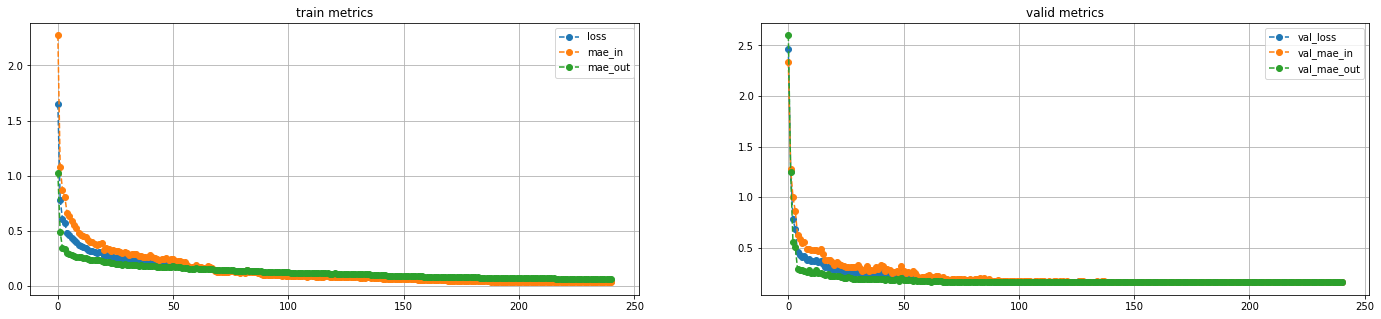

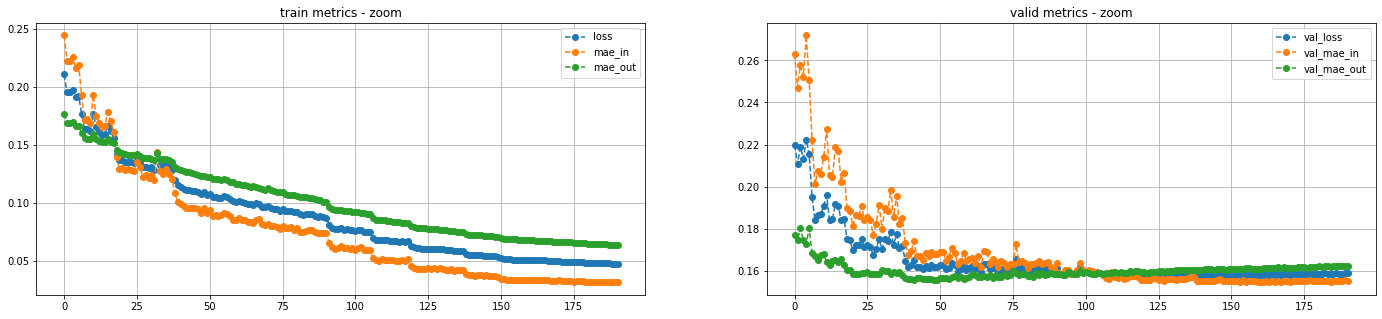

----------------------------------- Fold: 7 ------------------------------------
Epoch 1/300
129/129 [==============================] - 132s 578ms/step - loss: 1.5904 - mae_in: 2.2668 - mae_out: 0.9140 - val_loss: 1.3418 - val_mae_in: 1.8106 - val_mae_out: 0.8730
Epoch 2/300
129/129 [==============================] - 30s 233ms/step - loss: 0.6606 - mae_in: 0.9506 - mae_out: 0.3705 - val_loss: 0.8220 - val_mae_in: 1.2134 - val_mae_out: 0.4307
Epoch 3/300
129/129 [==============================] - 30s 233ms/step - loss: 0.5803 - mae_in: 0.8258 - mae_out: 0.3347 - val_loss: 0.5754 - val_mae_in: 0.8157 - val_mae_out: 0.3351
Epoch 4/300
129/129 [==============================] - 30s 233ms/step - loss: 0.5170 - mae_in: 0.7278 - mae_out: 0.3061 - val_loss: 0.5240 - val_mae_in: 0.7582 - val_mae_out: 0.2898
Epoch 5/300
129/129 [==============================] - 30s 233ms/step - loss: 0.4656 - mae_in: 0.6425 - mae_out: 0.2887 - val_loss: 0.4762 - val_mae_in: 0.6800 - val_mae_out: 0.2724
Epoch 6/

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-tangle-2h_fold6/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-tangle-2h_fold6/assets


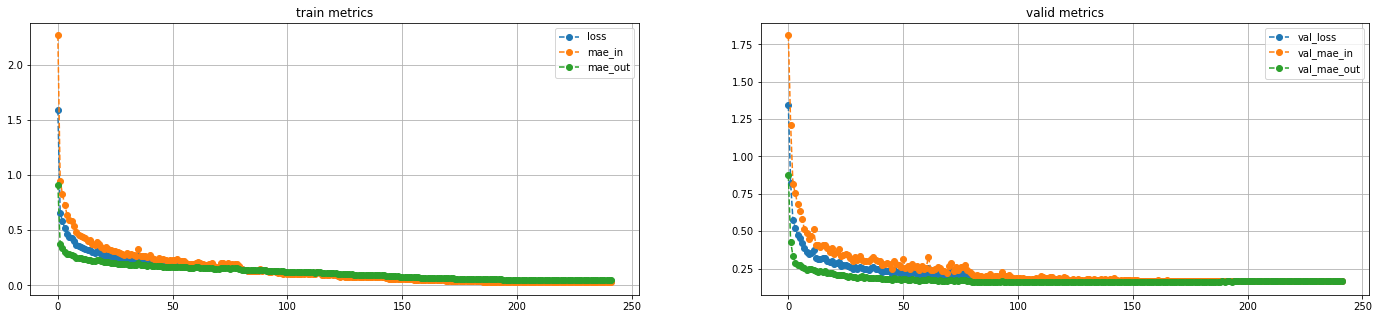

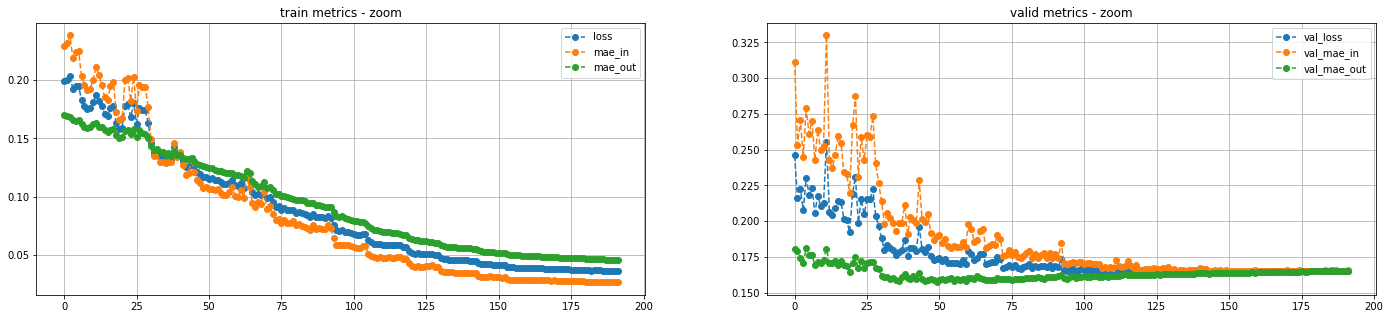

----------------------------------- Fold: 8 ------------------------------------
Epoch 1/300
129/129 [==============================] - 126s 570ms/step - loss: 1.6160 - mae_in: 2.2068 - mae_out: 1.0252 - val_loss: 1.2323 - val_mae_in: 1.7204 - val_mae_out: 0.7442
Epoch 2/300
129/129 [==============================] - 30s 233ms/step - loss: 0.7063 - mae_in: 1.0160 - mae_out: 0.3967 - val_loss: 0.7419 - val_mae_in: 1.0407 - val_mae_out: 0.4432
Epoch 3/300
129/129 [==============================] - 30s 233ms/step - loss: 0.5924 - mae_in: 0.8450 - mae_out: 0.3399 - val_loss: 0.5419 - val_mae_in: 0.7574 - val_mae_out: 0.3263
Epoch 4/300
129/129 [==============================] - 30s 233ms/step - loss: 0.5204 - mae_in: 0.7283 - mae_out: 0.3125 - val_loss: 0.4983 - val_mae_in: 0.7049 - val_mae_out: 0.2918
Epoch 5/300
129/129 [==============================] - 30s 233ms/step - loss: 0.4736 - mae_in: 0.6546 - mae_out: 0.2925 - val_loss: 0.4652 - val_mae_in: 0.6451 - val_mae_out: 0.2853
Epoch 6/

INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-tangle-2h_fold7/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/kaggle/gb-vpp/artifacts/lstm-gru-tangle-2h_fold7/assets


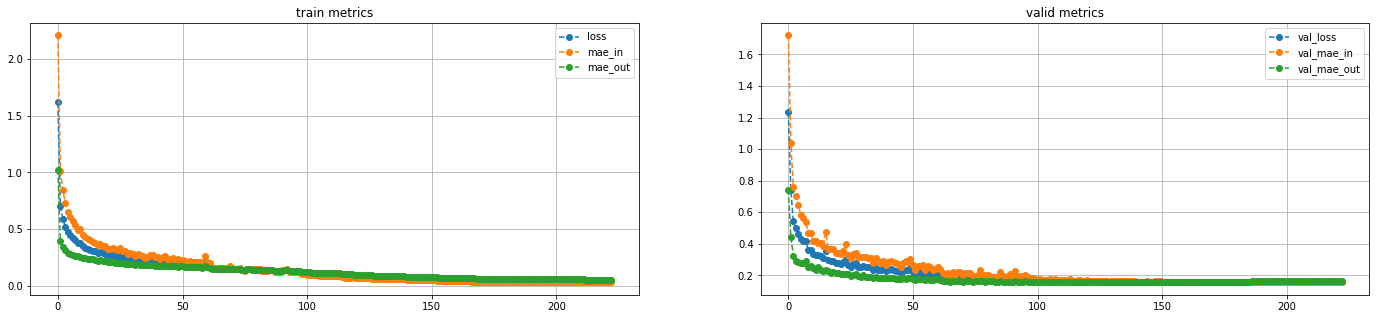

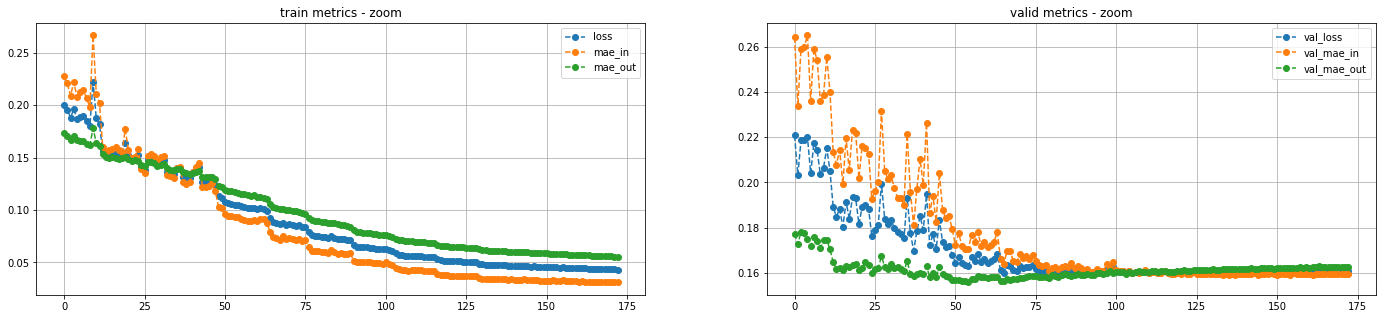

In [23]:
models_by_fold = list()

for fold in range(len(split)):
    print(f" Fold: {fold+1} ".center(80, "-"))
    
    train_idx = split[f"fold-{fold}"]["train"]
    valid_idx = split[f"fold-{fold}"]["valid"]

    X_train, X_valid = train[train_idx], train[valid_idx]
    y_train, y_valid = targets[train_idx], targets[valid_idx]

    mask_in_train, mask_in_valid = mask_in[train_idx], mask_in[valid_idx]
    mask_out_train, mask_out_valid = mask_out[train_idx], mask_out[valid_idx]

    model_path = f"{artifacts_path}/{config.MODEL_ID}_fold{fold}"

    if os.path.isdir(model_path):
        #with tpu_strategy.scope():
        load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
        model = tf.keras.models.load_model(model_path, options=load_locally)
        do_train = False
    else:
        do_train = True

    if do_train:

        lr = ReduceLROnPlateau(
            monitor="val_mae_in", 
            factor=config.SCHEDULER_FACTOR, 
            patience=config.SCHEDULER_PATIENCE, 
            verbose=1,
            min_lr=1e-4,
            min_delta=0.0001,
        )
        es = EarlyStopping(
            monitor='val_mae_in', 
            mode='min', 
            patience=config.STOPPING_PATIENCE, 
            min_delta=0.0001,
            verbose=1,
            restore_best_weights=True,
        )

        with tpu_strategy.scope():
            model = LSTMGRU2Heads()
            optimizer = tf.optimizers.Adam(learning_rate=1e-3)
            model.compile(optimizer=optimizer,)

            history = model.fit(
                [X_train,mask_in_train,mask_out_train], 
                y_train, 
                validation_data=([X_valid,mask_in_valid,mask_out_valid], y_valid), 
                epochs=config.EPOCHS,
                batch_size=config.BATCH_SIZE, 
                callbacks=[es,lr],
                shuffle=True,
                verbose=1,
            )

        save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
        model.save(model_path, options=save_locally)

        # metrics from epoch 0 ->
        plt.figure(figsize=(24,5))
        plt.subplot(1,2,1)
        plt.title("train metrics")
        plt.plot(history.history["loss"], "o--", label="loss")
        plt.plot(history.history["mae_in"], "o--", label="mae_in")
        plt.plot(history.history["mae_out"], "o--", label="mae_out")
        plt.grid()
        plt.legend(loc="best")

        plt.subplot(1,2,2)
        plt.title("valid metrics")
        plt.plot(history.history["val_loss"], "o--", label="val_loss")
        plt.plot(history.history["val_mae_in"], "o--", label="val_mae_in")
        plt.plot(history.history["val_mae_out"], "o--", label="val_mae_out")
        plt.grid()
        plt.legend(loc="best")
        plt.show()

        # metrics from epoch 50 ->
        plt.figure(figsize=(24,5))
        plt.subplot(1,2,1)
        plt.title("train metrics - zoom")
        plt.plot(history.history["loss"][50:], "o--", label="loss")
        plt.plot(history.history["mae_in"][50:], "o--", label="mae_in")
        plt.plot(history.history["mae_out"][50:], "o--", label="mae_out")
        plt.grid()
        plt.legend(loc="best")

        plt.subplot(1,2,2)
        plt.title("valid metrics - zoom")
        plt.plot(history.history["val_loss"][50:], "o--", label="val_loss")
        plt.plot(history.history["val_mae_in"][50:], "o--", label="val_mae_in")
        plt.plot(history.history["val_mae_out"][50:], "o--", label="val_mae_out")
        plt.grid()
        plt.legend(loc="best")
        plt.show()


    # generate the oof predictions
    oof_preds = model(tf.convert_to_tensor(X_valid), training=False)[0].numpy().squeeze()
    idx = oof.query("breath_id in @valid_idx").index
    oof.loc[idx, "pred"] = oof_preds.ravel()
    
    models_by_fold.append(model)

In [25]:
print("mae:", oof.eval("abs(pressure - pred)").mean())
print("mae inspiratory:", oof.query("u_out == 0").eval("abs(pressure - pred)").mean())
print("mae expiratory :", oof.query("u_out == 1").eval("abs(pressure - pred)").mean())

mae: 3.8102158917591105
mae inspiratory: 0.16085934514938122
mae expiratory : 6.042655846577479


conv1d-lstm-v1
- mae: 0.17370935429833725
- mae inspiratory: 0.19758568370809254
- mae expiratory : 0.15910336251107587

***
## sub generation

In [40]:
all_preds = list()
test_tf = tf.convert_to_tensor(test, dtype=tf.float32)

for model in tqdm(models_by_fold):
    preds = model.call(test_tf)[0].numpy().squeeze().ravel()
    all_preds.append(preds)

test_raw["pressure"] = np.median(all_preds, axis=0)

100%|██████████| 8/8 [35:53<00:00, 269.24s/it]


In [42]:
# saves final sub
sub = pd.merge(submission["id"], test_raw[["id","pressure"]], how="left", on="id")
sub["pressure"] = sub["pressure"].fillna(0)
sub.to_csv(f"{subs_path}/sub_{config.MODEL_ID}.csv", index=False)

sub["pressure"] =\
    np.round( (sub.pressure - PRESSURE_MIN)/PRESSURE_STEP ) * PRESSURE_STEP + PRESSURE_MIN
sub.pressure = np.clip(sub.pressure, PRESSURE_MIN, PRESSURE_MAX)
sub.to_csv(f"{subs_path}/sub_{config.MODEL_ID}_clip.csv", index=False)

In [43]:
# saves oof preds
oof.to_csv(f"{results_path}/oof_{config.MODEL_ID}.csv", index=False)

In [44]:
# saves each model preds (pseudo labels)
for fold,preds in enumerate(all_preds):
    file_path = f"{results_path}/predictions_{config.MODEL_ID}_{fold}.csv"
    if os.path.isfile(file_path):
        continue
    _sub = submission.copy()
    _test = test_raw[["id","pressure"]].copy()
    _test["pressure"] = preds
    _sub = pd.merge(_sub["id"], _test[["id","pressure"]], how="left", on="id")
    _sub["pressure"] = _sub["pressure"].fillna(0)
    _sub.to_csv(file_path, index=False)

***